# **Customer Churn Prediction Using Artificial Neural Networks (ANN)**

Customer churn is a critical challenge in the banking industry. Retaining existing customers is significantly more cost-effective than acquiring new ones. Predicting customer churn enables banks to take proactive retention actions such as personalized offers, improved services, and targeted communication.

In this project, an Artificial Neural Network (ANN) is developed to predict whether a customer will exit (churn) or remain with the bank based on demographic and financial attributes.

Objectives

- Build an ANN-based binary classification model for customer churn prediction

- Evaluate the model using standard classification metrics

- Use the trained model to predict churn probability for a new customer

In [16]:
# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
# 2. Data Loading
df = pd.read_csv('Churn_Modelling.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
# 3. Data Preprocessing

# 3.1 Feature–Target Split
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
Y = df['Exited']

# 3.2 Encoding Categorical Variables

# Encode Gender
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

# One-Hot Encode Geography
X = pd.get_dummies(X, columns=['Geography'], drop_first=True)


In [19]:
# 4. Train–Test Split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=3,
    stratify=Y
)

In [20]:
# 5. Feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Building the Artificial Neural Network**

- Hidden layers: 1

- Neurons: 100

- Activation: ReLU

- Optimizer: Adam

- Loss Function: Log-loss (implicit for classification)

In [21]:
# 6. Model Architecture
ann = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=200,
    momentum=0.9,
    random_state=3
)

In [22]:
# 7. Model Training
ann.fit(X_train_scaled, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=3)

In [23]:
# 8. Model Evaluation

# 8.1 Predictions
Y_pred = ann.predict(X_test_scaled)

# 8.2 Accuracy & Classification Report
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

print(classification_report(Y_test, Y_pred))

# 8.3 Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

Accuracy: 0.8585
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.74      0.47      0.57       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

[[1527   66]
 [ 217  190]]


|                    | Predicted No | Predicted Yes |
| ------------------ | ------------ | ------------- |
| **Actual No (0)**  | 1527 (TN)    | 66 (FP)       |
| **Actual Yes (1)** | 217 (FN)     | 190 (TP)      |


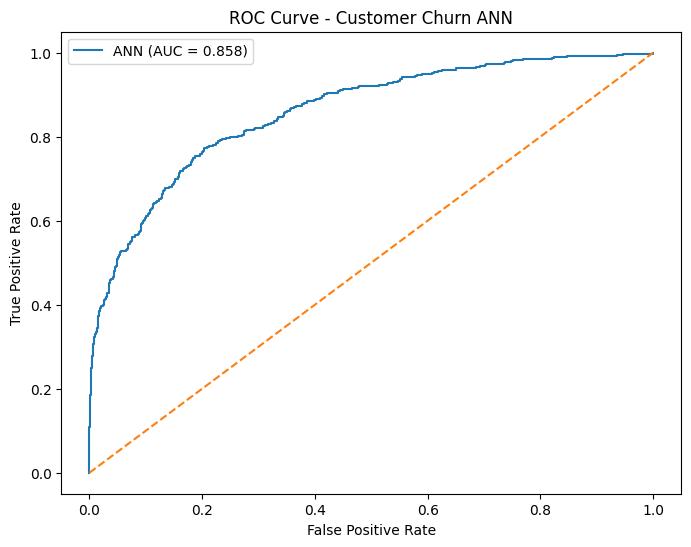

In [24]:
# 8.4 ROC Curve & AUC Score
from sklearn.metrics import roc_curve, roc_auc_score

Y_prob = ann.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(Y_test, Y_prob)
auc_score = roc_auc_score(Y_test, Y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ANN (AUC = {auc_score:.3f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Customer Churn ANN')
plt.legend()
plt.show()

### 9. **New Customer Prediction**

**Customer Profile**

- Geography: France

- Credit Score: 600

- Gender: Male

- Age: 40

- Tenure: 3

- Balance: $60,000

- Products: 2

- Credit Card: Yes

- Active Member: Yes

- Salary: $50,000

In [25]:
customer_data = np.array([[600, 1, 40, 3, 60000, 2, 1, 1, 50000, 0, 0]])
customer_df = pd.DataFrame(customer_data, columns=X_train.columns)

customer_data_scaled = scaler.transform(customer_df)

pred_class = ann.predict(customer_data_scaled)[0]
churn_probability = ann.predict_proba(customer_data_scaled)[:, 1][0]

print("Predicted Class:", pred_class)
print("Churn Probability:", churn_probability)

Predicted Class: 0
Churn Probability: 0.023283721418663954


In [26]:
### Interpretation

if churn_probability > 0.5:
    print(f"Customer is likely to churn (Probability: {churn_probability:.2f})")
else:
    print(f"Customer is likely to stay (Probability: {churn_probability:.2f})")

Customer is likely to stay (Probability: 0.02)


**Result:**

The churn probability is 0.02, indicating the customer is very likely to stay.

**Key Findings**

- The ANN achieved strong predictive performance

- ROC-AUC demonstrates good class separation

- Probability-based predictions allow flexible business decision thresholds